In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

import os
import cv2
import numpy as np
import torch
from PIL import Image
from pytorch_lightning import seed_everything
from tqdm import tqdm

from cldm.model import create_model, load_state_dict
from dataset import PhotoSketchDataset
from inference import run_sampler
from share import *

logging improved.


In [3]:
dataset = PhotoSketchDataset(split="test", data_dir="/raid/lingo/alexisro/ControlNet/project/data/sketch/")

In [4]:
example = dataset[0]
prompt = example["txt"]
sketch = cv2.imread(dataset.sketches[0])

prompt:  a pair of shoes sitting on top of a sandy beach
source:  /raid/lingo/alexisro/ControlNet/project/data/sketch/sketch-rendered/width-5/00000901_01.png
target:  /raid/lingo/alexisro/ControlNet/project/data/sketch/image/00000901.jpg


a pair of shoes sitting on top of a sandy beach


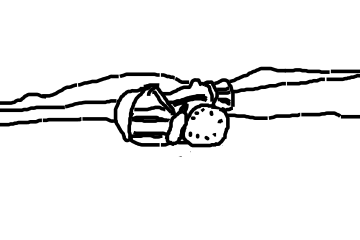

In [5]:
print(prompt)
Image.fromarray(cv2.cvtColor(sketch, cv2.COLOR_BGR2RGB), "RGB")

In [6]:
model = create_model('../models/cldm_v15.yaml').cpu()

No module 'xformers'. Proceeding without it.
ControlLDM: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Loaded model config from [../models/cldm_v15.yaml]


In [7]:
model.load_state_dict(load_state_dict("/raid/lingo/alexisro/ControlNet/project/experiments/sketch_0503/lightning_logs/version_9/checkpoints/epoch=28-step=57999.ckpt", location='cuda'))
model = model.cuda()

Loaded state_dict from [/raid/lingo/alexisro/ControlNet/project/experiments/sketch_0503/lightning_logs/version_9/checkpoints/epoch=28-step=57999.ckpt]


In [8]:
results = run_sampler(model, sketch, prompt, seed=42)

Global seed set to 42


Data shape for DDIM sampling is (1, 4, 32, 48), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|██████████| 20/20 [00:03<00:00,  5.35it/s]


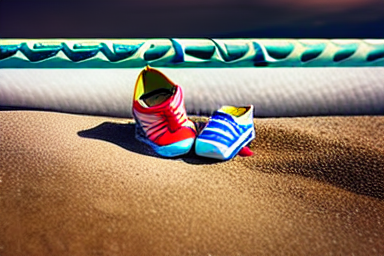

In [9]:
Image.fromarray(results[0], "RGB")

# Running inference on the whole test set

In [ ]:
RESOLUTION = 512
OUTPUT_DIR = f"photosketch_test_outputs_{RESOLUTION}/"
os.makedirs(OUTPUT_DIR, exist_ok=True)

for i in tqdm(range(len(dataset))):
    example = dataset[i]
    prompt = example["txt"]
    sketch = cv2.imread(dataset.sketches[i])
    results = run_sampler(model, sketch, prompt, image_resolution=RESOLUTION, seed=42, show_progress=False)
    
    image = Image.fromarray(results[0], "RGB")
    image.save(os.path.join(OUTPUT_DIR, f"image_{i:03d}.jpg"))

  0%|          | 0/500 [00:00<?, ?it/s]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  0%|          | 1/500 [00:09<1:17:26,  9.31s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  0%|          | 2/500 [00:18<1:17:21,  9.32s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  1%|          | 3/500 [00:27<1:17:14,  9.33s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  1%|          | 4/500 [00:37<1:17:09,  9.33s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  1%|          | 5/500 [00:46<1:17:09,  9.35s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  1%|          | 6/500 [00:56<1:17:01,  9.35s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  1%|▏         | 7/500 [01:05<1:16:49,  9.35s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  2%|▏         | 8/500 [01:14<1:16:41,  9.35s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  2%|▏         | 9/500 [01:24<1:16:37,  9.36s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  2%|▏         | 10/500 [01:33<1:16:29,  9.37s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  2%|▏         | 11/500 [01:42<1:16:24,  9.37s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  2%|▏         | 12/500 [01:52<1:16:15,  9.38s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  3%|▎         | 13/500 [02:01<1:16:05,  9.38s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  3%|▎         | 14/500 [02:11<1:15:55,  9.37s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps


  3%|▎         | 15/500 [02:20<1:15:46,  9.37s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 96, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


  3%|▎         | 16/500 [02:29<1:15:34,  9.37s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 96, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


  3%|▎         | 17/500 [02:39<1:15:24,  9.37s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 96, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


  4%|▎         | 18/500 [02:48<1:15:14,  9.37s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 96, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


  4%|▍         | 19/500 [02:57<1:15:06,  9.37s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 96, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


  4%|▍         | 20/500 [03:07<1:14:57,  9.37s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 96, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


  4%|▍         | 21/500 [03:16<1:14:46,  9.37s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 96, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


  4%|▍         | 22/500 [03:25<1:14:36,  9.37s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 96, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


  5%|▍         | 23/500 [03:35<1:14:26,  9.36s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 96, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


  5%|▍         | 24/500 [03:44<1:14:20,  9.37s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 96, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


  5%|▌         | 25/500 [03:54<1:14:11,  9.37s/it]Global seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 96), eta 0.0
Running DDIM Sampling with 20 timesteps
